# Regression Linéaire avec Statsmodels

## Importation des librairies

In [3]:
import statsmodels.api as sm

In [4]:
import statsmodels.formula.api as smf

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import sklearn

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

## on observe les données

In [9]:
df = pd.read_csv('Real estate.csv')

In [10]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [12]:
#print the shape
df.shape

(414, 8)

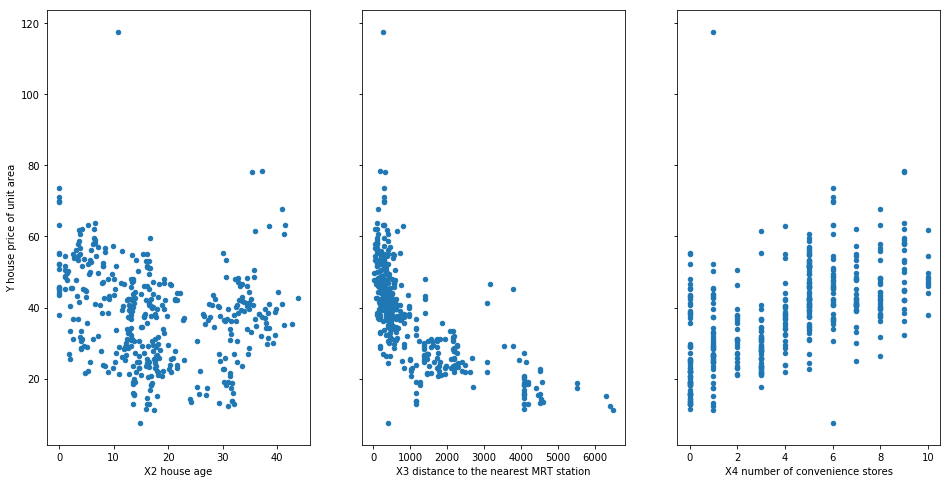

In [13]:
#visualisation des relations
figs,axs = plt.subplots(1, 3, sharey = True)
df.plot(kind = 'scatter', x = 'X2 house age', y = 'Y house price of unit area',ax=axs[0], figsize=(16, 8) )
df.plot(kind = 'scatter', x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area', ax=axs[1] )
df.plot(kind ='scatter', x = 'X4 number of convenience stores', y = 'Y house price of unit area', ax=axs[2])

In [14]:
X = df[["X3 distance to the nearest MRT station"]]
y = df[["Y house price of unit area"]]

## Régression Linéaire avec statsmodels

In [15]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())


                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.195
Model:                                    OLS   Adj. R-squared:                  0.193
Method:                         Least Squares   F-statistic:                     100.1
Date:                        Mon, 10 Feb 2020   Prob (F-statistic):           2.97e-21
Time:                                17:42:24   Log-Likelihood:                -2073.2
No. Observations:                         414   AIC:                             4148.
Df Residuals:                             413   BIC:                             4152.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [16]:
X = df[["X3 distance to the nearest MRT station","X4 number of convenience stores", "X2 house age"]]
X = sm.add_constant(X)
y = df[["Y house price of unit area"]]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.541
Model:                                    OLS   Adj. R-squared:                  0.538
Method:                         Least Squares   F-statistic:                     161.1
Date:                        Mon, 10 Feb 2020   Prob (F-statistic):           5.44e-69
Time:                                17:42:24   Log-Likelihood:                -1506.5
No. Observations:                         414   AIC:                             3021.
Df Residuals:                             410   BIC:                             3037.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [17]:
#regression avec skitlearn
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression().fit(X,y)
reg.coef_

array([[ 0.        , -0.00537913,  1.29744248, -0.25285583]])

In [19]:
reg.intercept_

array([42.97728621])

In [20]:
#tprediction
results.predict()

array([47.40375034, 48.07436724, 43.07852862, 43.07852862, 46.0993014 ,
       33.37456896, 39.9821149 , 44.08191666,  6.60923209, 32.75153798,
       33.29565051, 52.57470191, 43.52959687, 29.72425667, 38.56354461,
       33.42958162, 49.18586792, 37.91190485, 47.10330967, 51.55432047,
       33.48952502, 47.90269176, 33.24138404, 48.00383409, 35.56823014,
       30.1600606 , 46.61579992, 45.34774298, 40.31347782, 45.24192333,
       12.11632193, 40.43613045, 32.06339697, 44.84883773, 47.0607081 ,
       17.518872  , 31.44652627, 33.92409478, 46.86915817, 43.81191859,
       17.58075915, 16.85460972, 37.54215143, 39.30535235, 44.61470775,
       41.47288038, 46.6715837 , 34.34547079, 12.08325432, 12.57896167,
       39.92301878, 26.9016475 , 31.01463869, 43.45374013, 43.83720418,
       28.71856653, 42.86387106, 50.87060583, 12.35139143, 44.29384237,
       32.40254428, 48.02505662, 30.81616899, 44.63999333, 33.19601187,
       42.55167827, 49.46776912, 46.75143695, 40.57800824, 43.28